## TASK 1 : Data cleaning & preprocessing



#### 1. Importing the dataset and exploring basic info

In [300]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [301]:
#importing the dataset and checking the dataset
df=pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [302]:
#Exploring the dataset basic information
print(f'Shape of dataset:{df.shape}')

print("\nData types of each column:")
print(df.dtypes)

print("\nNumber of missing values in each column:")
print(df.isnull().sum())

Shape of dataset:(891, 12)

Data types of each column:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Number of missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


#### 2. Handling Missing Values

In [303]:
print("Columns with missing values and their data types:")

missing_columns = df.columns[df.isnull().any()]
for col in missing_columns:
    print(f"Column: {col}, Data Type: {df[col].dtype}")

Columns with missing values and their data types:
Column: Age, Data Type: float64
Column: Cabin, Data Type: object
Column: Embarked, Data Type: object


In [304]:
# Fill missing values in 'Age' column with the median age
df['Age']=df['Age'].fillna(df['Age'].median())
# Fill missing values in 'Embarked' column with the mode
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0]) 
#handling missing values in 'Cabin' ccolumn by imputing 'Unknown'
df['Cabin'] = df['Cabin'].fillna('Unknown')


In [305]:
df.isna().sum()  

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

#### 3.Encoding the dataset

In [306]:
#checking and printing the categorical columns with their data types
cat_col= df.select_dtypes(include=['object']).columns
print(df[cat_col].dtypes)

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object


In [307]:
#encoding categorical columns into numericals 
from sklearn.preprocessing import LabelEncoder



In [308]:
#using label encoding for Sex column
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])


In [309]:
# using one-hot encoding for Embarked column
df=pd.get_dummies(df, columns=["Embarked"], prefix="Embarked", dtype=int)

In [310]:
#checking and printing the categorical columns with their data types after encoding
cat_col= df.select_dtypes(include=['object']).columns
print(df[cat_col].dtypes)
# NOTE: since 'names','ticket'and 'cabin' columns are not useful for analysis and contain many unique values, we can drop them

Name      object
Ticket    object
Cabin     object
dtype: object


#### 4.Normalizing/Standardizing the numerical features

In [311]:
# Selecting numerical columns for scaling
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop(['PassengerId', 'Survived']) 
#checking the numerical columns
print(df[num_cols].head())


   Pclass   Age  SibSp  Parch     Fare
0       3  22.0      1      0   7.2500
1       1  38.0      1      0  71.2833
2       3  26.0      0      0   7.9250
3       1  35.0      1      0  53.1000
4       3  35.0      0      0   8.0500


In [312]:
#Normalissing/standardizing the numerical columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
#checking the numerical columns after scaling
print(df[num_cols].head())

     Pclass       Age     SibSp     Parch      Fare
0  0.827377 -0.565736  0.432793 -0.473674 -0.502445
1 -1.566107  0.663861  0.432793 -0.473674  0.786845
2  0.827377 -0.258337 -0.474545 -0.473674 -0.488854
3 -1.566107  0.433312  0.432793 -0.473674  0.420730
4  0.827377  0.433312 -0.474545 -0.473674 -0.486337


#### 5.Visualizing outliers using boxplot and removing

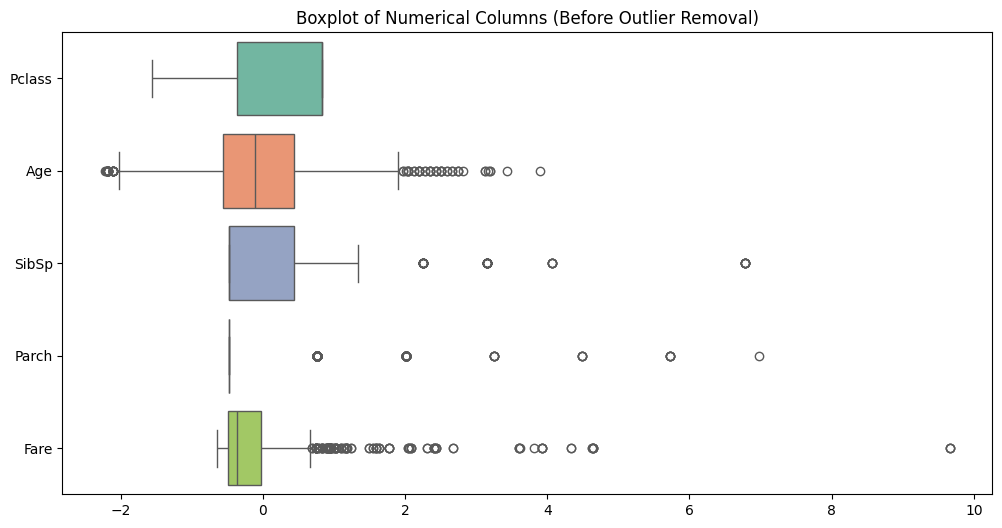

In [313]:
# Plot boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols], orient="h", palette="Set2")
plt.title("Boxplot of Numerical Columns (Before Outlier Removal)")
plt.show()

In [314]:
#removing outliers using interquartile method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter rows without outliers
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
# Removing outliers for each numerical column
for col in num_cols:
    df = remove_outliers(df, col)



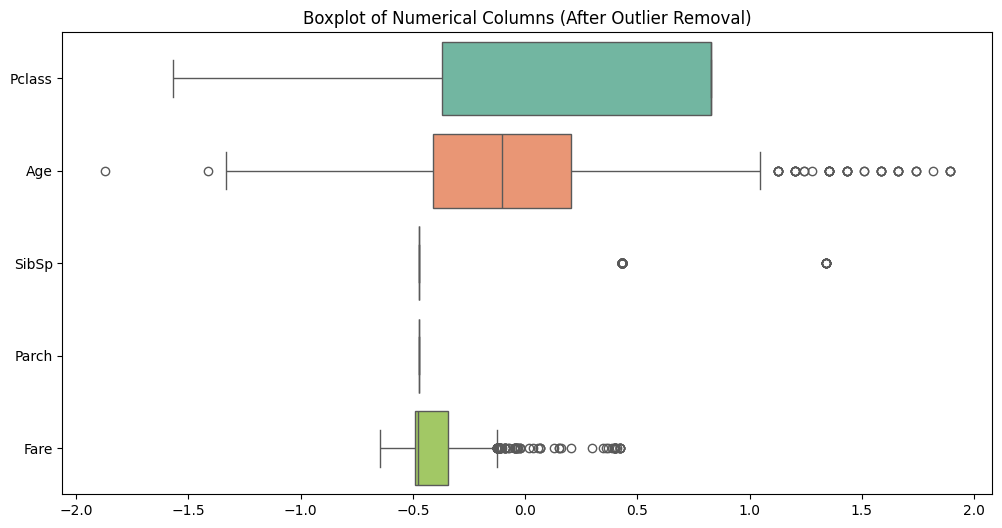

In [315]:
# Plot boxplots after outlier removal
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols], orient="h", palette="Set2")
plt.title("Boxplot of Numerical Columns (After Outlier Removal)")
plt.show()

In [318]:
df.shape

(561, 14)

In [319]:
#exporting the cleaned dataset to a new CSV file
df.to_csv('Cleaned_Titanic_Dataset.csv', index=False)